 MIT Applied Data Science Program 
 
 Machine Learning Regression Project
 
Boston House Price Prediction

Hellen S Momoh

October 21 2022

# Context

Housing is one of our most essential needs, along with other fundamental needs. 
Over the years, people's living standards have  improved so as the demand for housing. 

We will use machine learning algorithms to build a prediction model for house prices that may provide a lot of information and knowledge to home buyers, property investors, and housebuilders, such as the valuation of house prices in the present market, which will help them determine house prices. Meanwhile, this model can help potential buyers decide the characteristics of a house they want according to their budget.

# Objective

In this project, we were asked to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features affecting the price of the house. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

In [1]:
# libraries for data manipulation
import pandas as pd

import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# library for preparing data
from sklearn.model_selection import train_test_split

# library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('Boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# Observation

The variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


# Observation
According to the info of the data, there are a total of 506 non-null observations in each of the columns indicating that 
there are no missing values in the data. There are 13 columns in the dataset and every column is of numeric data type.


In [40]:
#QUESTION1
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [41]:
#QUESTION1
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Observation:


The summary statistics of this data computes the five number summary.

It also counts the number of variables in the dataset.

The statistical components of these numbers are their measures of dispersions.

The MEDV column/variable has a total count of 506.0 which indicates the sample studied.

The mean is 22.532806 which is the sample average, the std is 9.197104	, and the min is 5.00000

In terms of quartiles, 17.025000 is the lowest quartile and 25.000000 is the upper quartile.

The interquartile range is 8 and the range itself is 45. The meadian is 21.20000 and it measures the average unit.


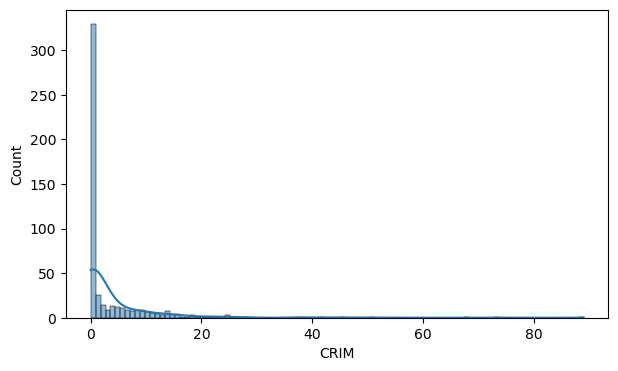

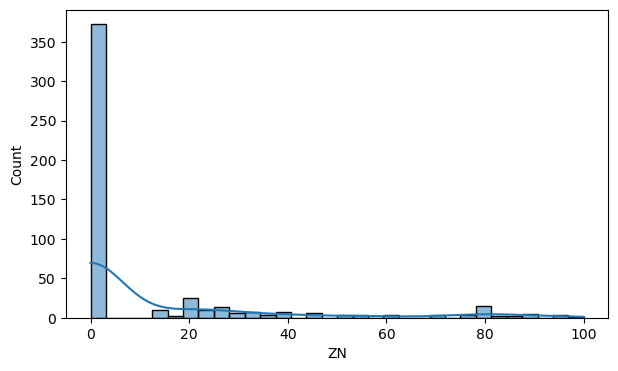

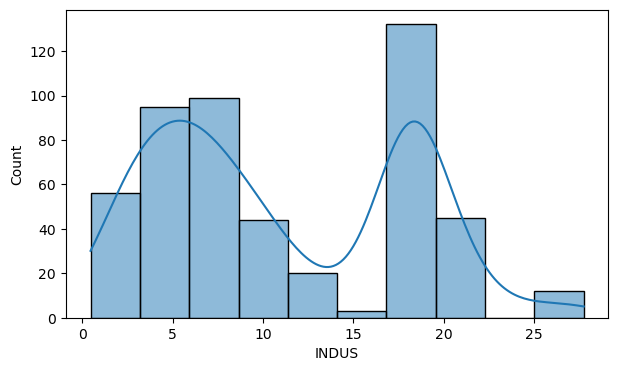

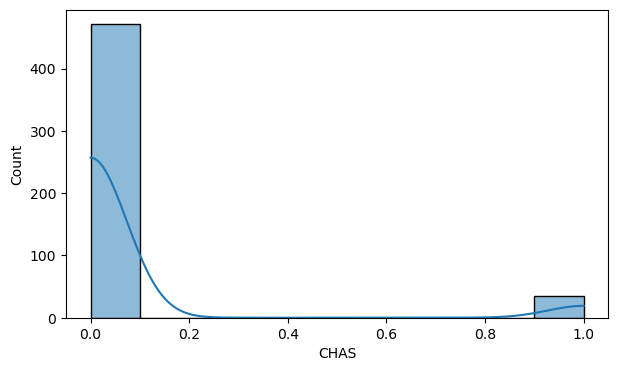

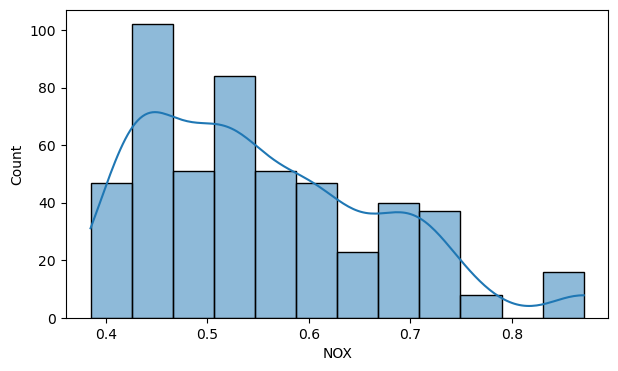

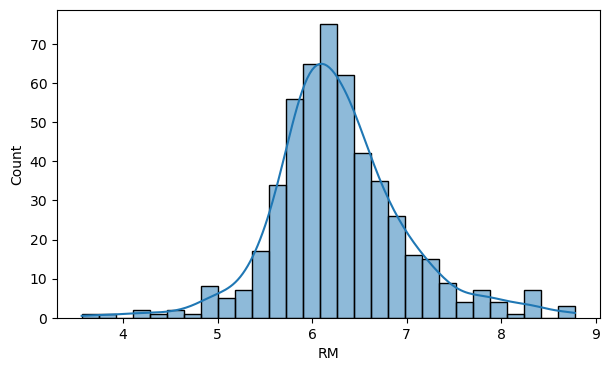

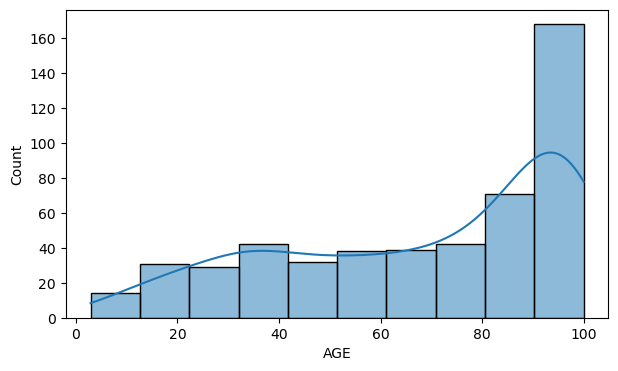

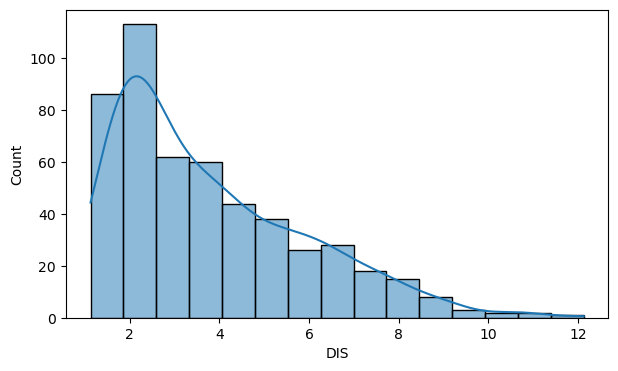

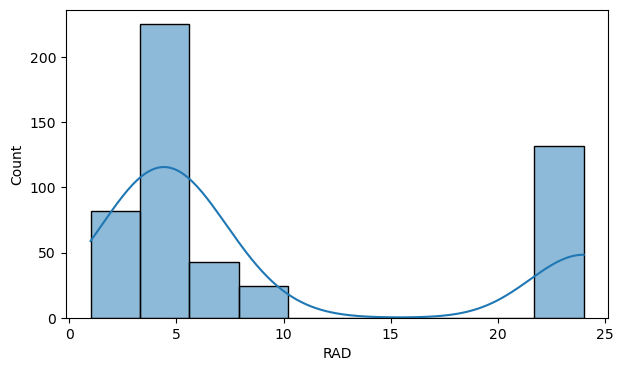

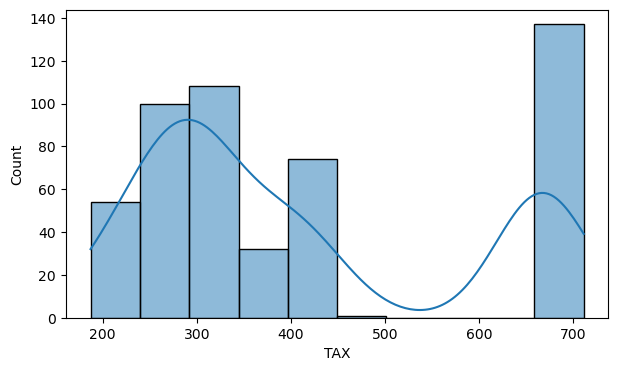

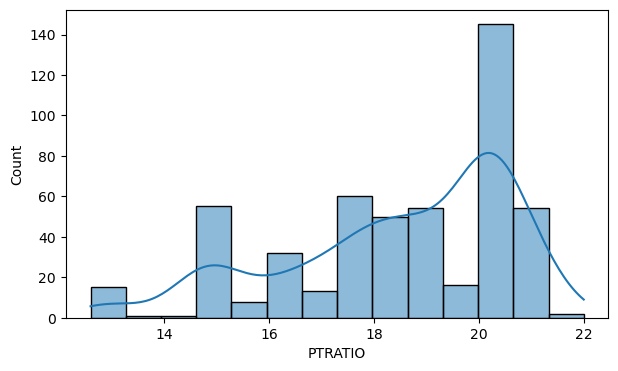

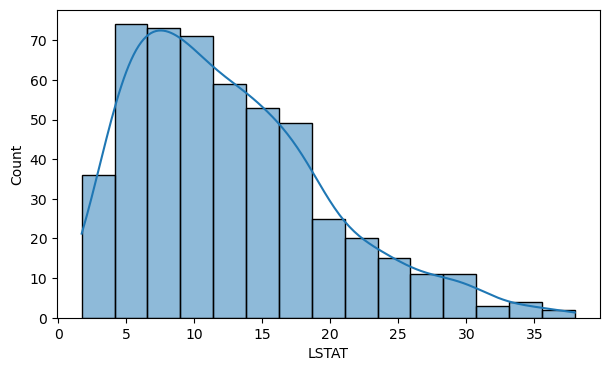

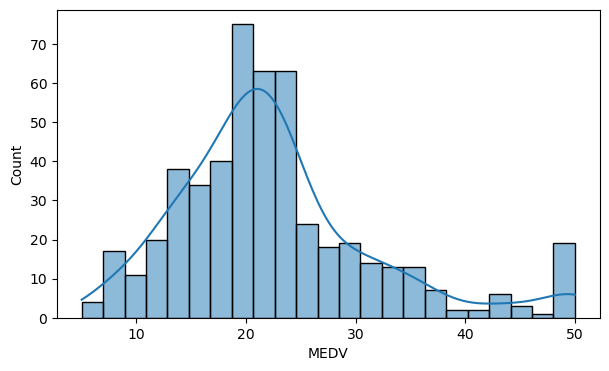

In [42]:
#QUESTION2
#Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

# Observation

Theere are diverse relationships between these distributions. The dependent varibale MEDV is seen to be slightly skewed which means we must apply a log transformation on the 'MEDV' column and check the distribution of the transformed column.

In [43]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

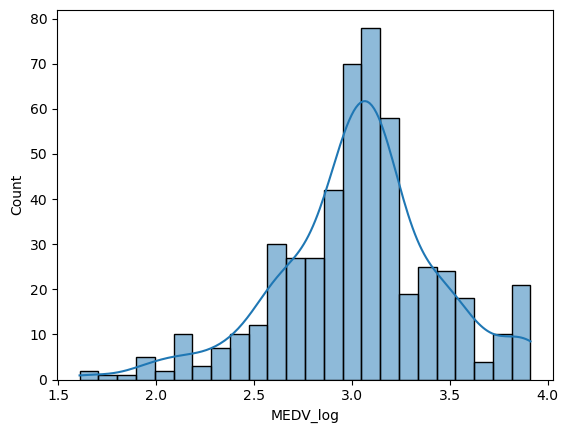

In [44]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

# Observation

Now that we have applied the log transformation on the dependent variable MEDV, the variable appears to have a nearly normal distribution without skew, which means we can proceed.

In [45]:
#QUESTION3
corr_matrix = df.corr()

corr_matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,MEDV_log
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.527946
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.363344
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.541556
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.158412
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.510600
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.632021
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.453422
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.342780
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.481971
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.561466


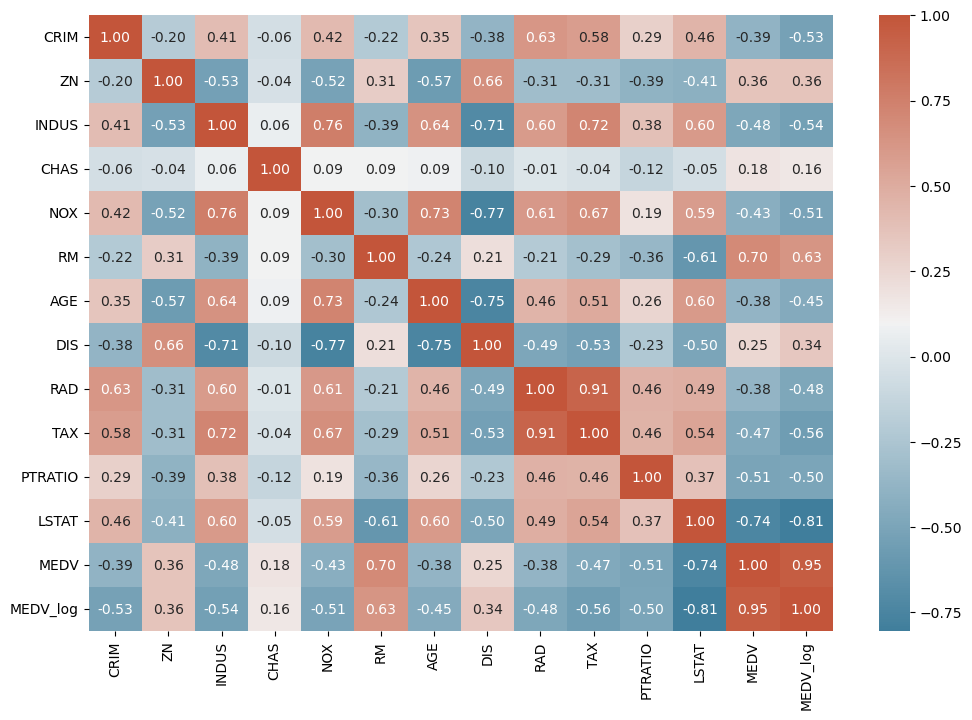

In [46]:
#QUESTION3

plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = cmap)

plt.show()


# Observation

The heatmap show significant correlations between the different pairs of features. i.e. "LSTAT" and "MEDV." 

The correlation between these varibales violates the linear assumptions. We will visualize these realtionships on a scatterplot to understand their patterns. 

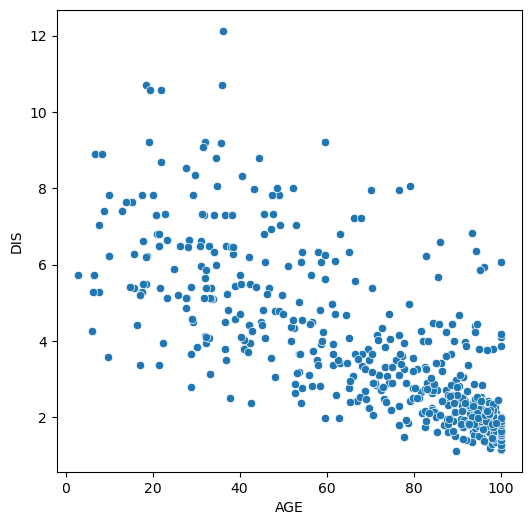

In [47]:
#Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

# Observations

The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

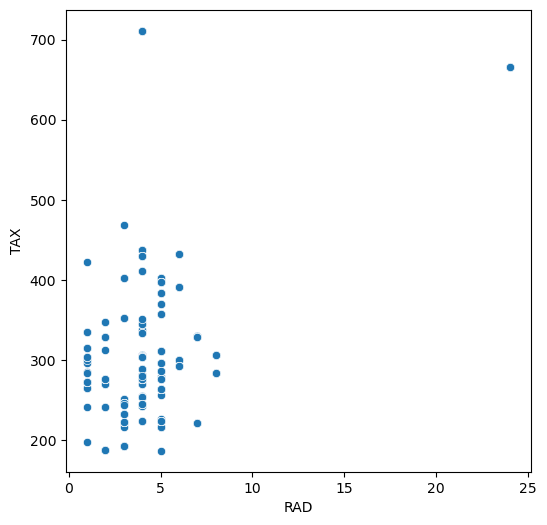

In [48]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

# Observations:

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
We assume that te strong correlation might be due to outliers.

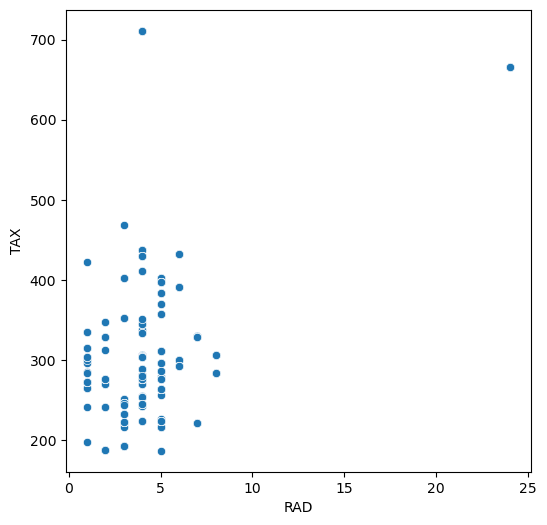

In [49]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

In [50]:
# Removing the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# the required function
from scipy.stats import pearsonr

# Calculating the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.249757313314292


# Observation



Well we were right. The high correlation between TAX and RAD is due to the outliers. 
The tax rate for some properties might be higher due to some other reason.

Now we visualize the relationship between the remaining features.

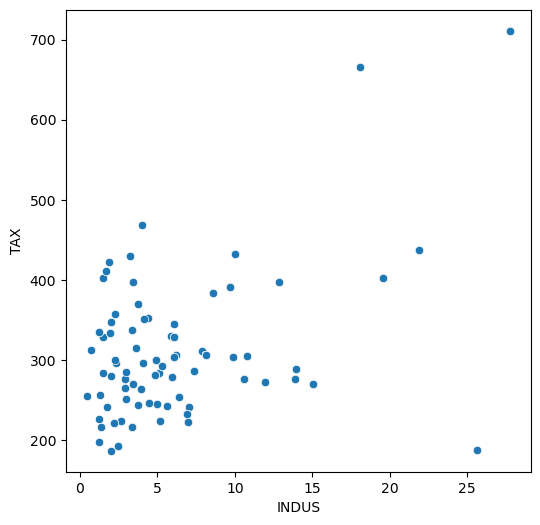

In [51]:

plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

# Observation

The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

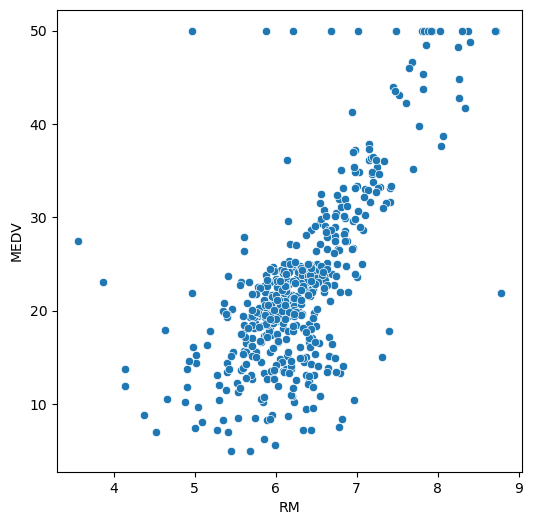

In [52]:

plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

# Observations:

The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

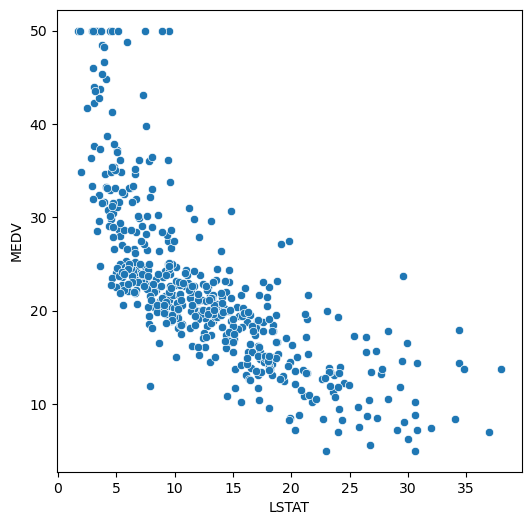

In [53]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

# Observations:

The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
There are few outliers and the data seems to be capped at 50.

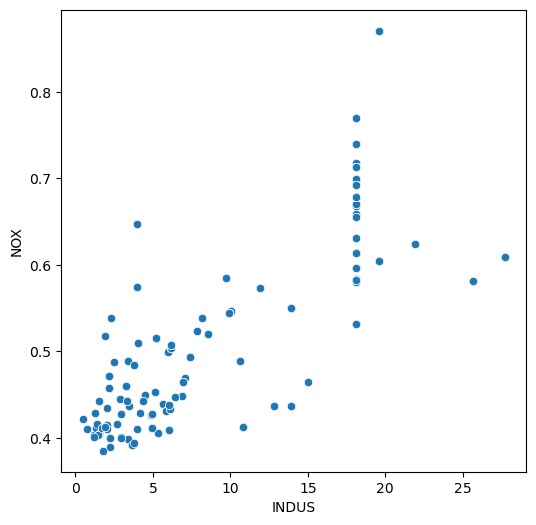

In [56]:
#QUESTION4

plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

# Observation

The plot shows that the Proportion of non-retail business acres per town (INDUS) falls in areas with higher Nitric Oxide concentration (parts per 10 million)(NOX), and places where there are more NOX, there are less INDUS. 

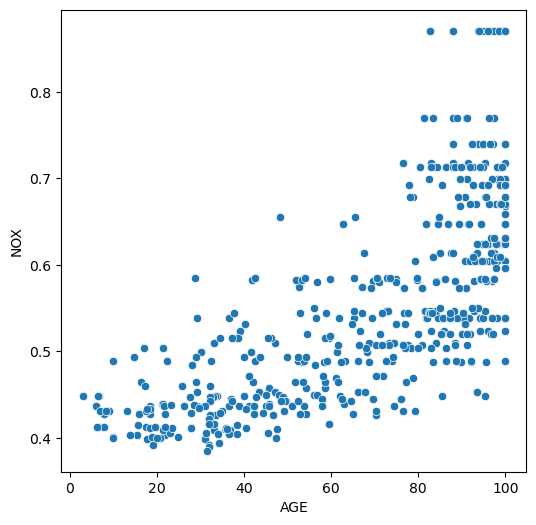

In [18]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

# Observation

The scatterplot shows a mix realtionship between "AGE and NOX." Older and younger people live in places with high levels of NOX. Other older people seem to care not much about NOX hence, places where there are non much NOX older people are less likely to live in those places.

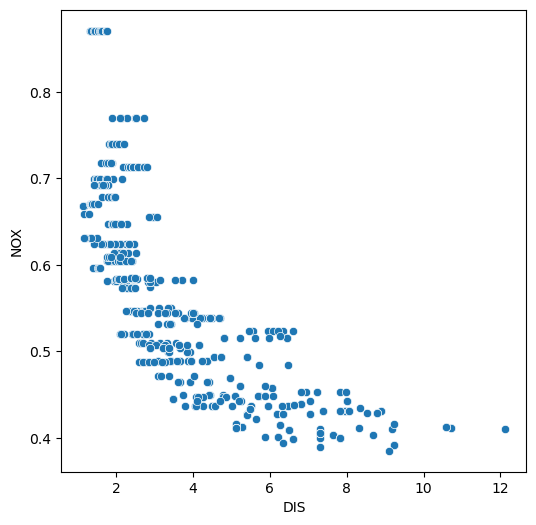

In [57]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

# Observation

There is also a mix relationship between "DIS and NOX." Weighted distances to Boston employment centers are not much in places with lower levels of "NOX."

# Observation
We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset and see. 

In [59]:
#separating the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

X = sm.add_constant(X)

In [60]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# checking the VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


# Observations:

There are two variables with a high VIF - RAD and TAX (greater than 5).

So we remove TAX as it has the highest VIF values and check the multicollinearity again.

In [62]:
#QUESTION5
#Creating the model after dropping TAX
X_train = X_train.drop(['TAX'], axis = 1)

# Checking for VIF again
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


# Observation

Now the VIF is less than 5 for all the independent variables so we will create the linear regression model. We can also assume that multicollinearity has been removed between the variables.

In [63]:
#QUESTION6
#Creating the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.40e-101
Time:                        20:31:46   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation

There are variables with p-values greater than 5 that are statistically irrelevant that we need to drop in other to build a better model. 

As we observe and determine the significance of the model, we drop the insignificant variables with p-value > 0.05 and create the regression model again.

Significance in this problems means whether the population regression parameters are significantly different from zero.

From the above, it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, we say that the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.


In [64]:
#QUESTION7

#Creating a new model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'], axis =1) 

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Creating the new model
model2 = sm.OLS(y_train, X_train).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.61e-104
Time:                        20:52:59   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation

We drop the irrelevant features with p-values greater than 5 that were statistically insignificant to the model. 

In [65]:
#QUESTION8
residuals = model2.resid

np.mean(residuals)

5.532297783725356e-16

# Observation
Residuals are diagnostisc measures used when assessing the quality of a machine learning model. 
The mean of residuals is not very far from 0. Hence, the corresponding assumption is satisfied.

Next we check for homoscedasticity since we anticipate that the residuals are symmetrically distributed across the regression line.

In [66]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [67]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)


[('F statistic', 1.083508292342529), ('p-value', 0.30190120067668275)]

# Observation

Since the p-value < 0.05, we can reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied. 

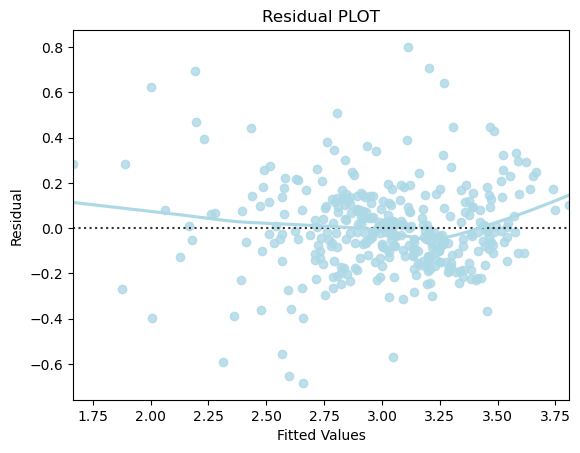

In [68]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

# Observation

There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

<AxesSubplot:ylabel='Count'>

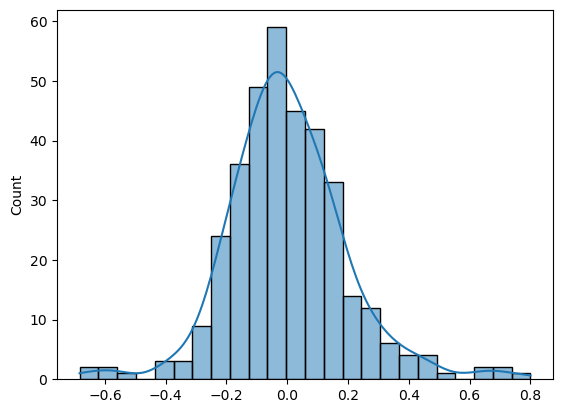

In [43]:
# Plotting the histogram of residuals

sns.histplot(residuals, kde = True)

# Observation

The histogram of the residuals is normally distributed.

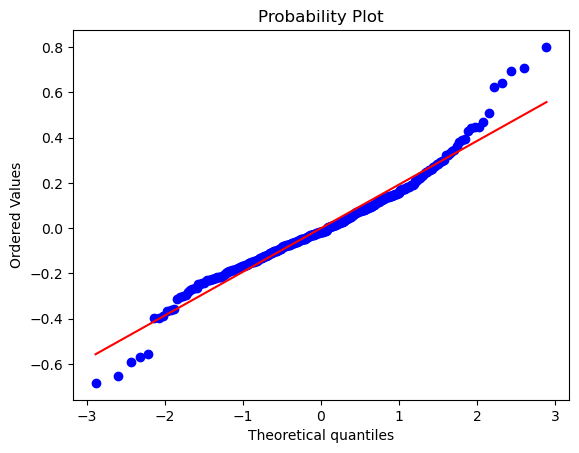

In [69]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

# Observation

From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test dataset.

In [71]:
#QUESTION9

#RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


# Observation

After checking the performance of the model on the train and test data set and comparing the model performance of train and test data, we see that the Mean Absolute Percentage Error (MAPE) which is the mean of all absolute percentage errors between the predicted and actual values is > 5.0 which places doubt on the performance of the model hence, we apply cross validation to improve the model and evaluate it using different evaluation metrics. 

In [72]:
# Importing the required function

from sklearn.model_selection import cross_val_score

# Building the regression model and cross-validating
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


In [76]:
#Question 11: 

#The conclusions and business recommendations derived from the model.

In this project, we used Machine Learning algorithms to identify the most important features affecting the price of housing in Boston. We employ the techniques of data preprocessing and built a linear regression model that predicts the prices for the unseen data. This prediction model will provide a lot of information and knowledge to home buyers, property investors, and potential buyers to decide the characteristics of the type of housing they prefer.

Recommendation: After conducting a proper engineering on the data by following all the necessary steps of gathering the summary statistics, data preprocessing and so on, It is recommended that property investors, and potential home buyers consider the listed independent features before making a business informed decision. This recommendation is based on the performance of our regression model with a Mean Squared Errro that is close to zero representing better quality of the regression model and an RSquared that measures the Goodness of Fit of the regression model determining a strong relationship between our dependent and independent features with a convenient score of 70+/100. 